## 1. 다중 클래스 분류(Multi-class Classification)
---
이진 분류가 두 개의 답중 하나를 고르는 문제였다면, 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류(Multi-class Classification)라고 한다. 아래의 문제는 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이라는 4개의 특성(feature)로부터 setosa, versicolor, virginica라는 3개의 붓꽃 품종 중 어떤 품종인지를 예측하는 문제로 전형적인 다중 클래스 분류 문제다.
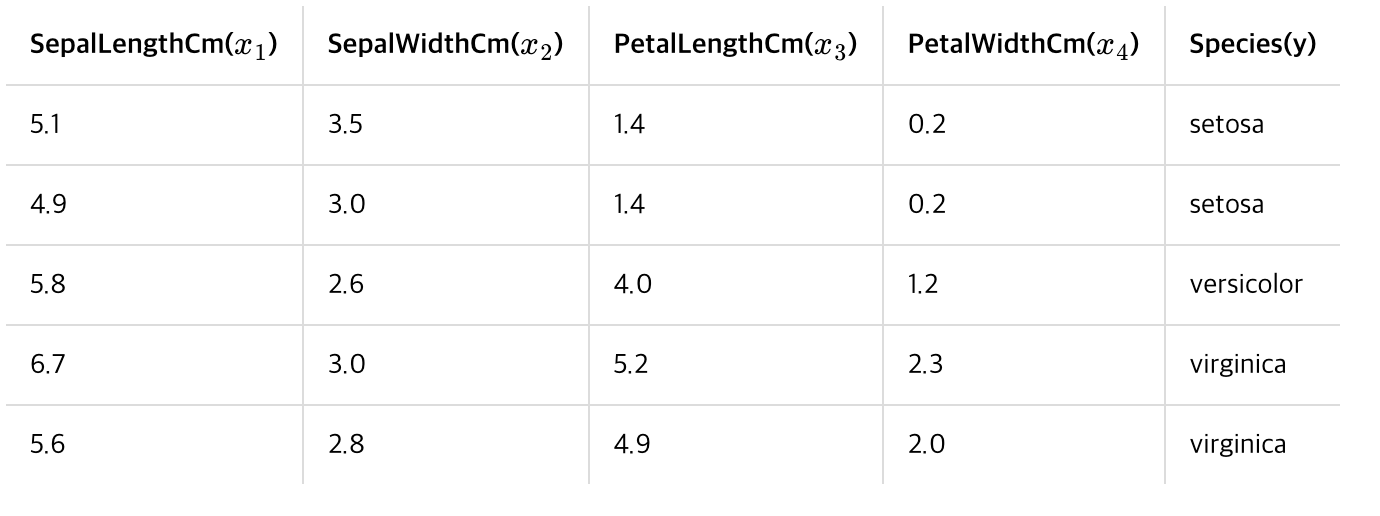
위 붓꽃 품종 분류하기 문제를 어떻게 풀지 고민하기 위해 앞서 배운 로지스틱 회귀의 이진 분류를 복습해본다.<br>
이번 챕터에서 입력은 X, 가중치는 W, 편향은 B, 출력은 ^Y(Y-hat)으로 각 변수는 벡터 또는 행렬로 가정한다.
- ^Y은 예측값이라는 의미를 가지고 있으므로 가설식에서 H(X) 대신 사용되기도 한다.
### 1. 로지스틱 회귀
로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1 사이의 값으로 만든다. 예를 들어 스팸 메일 분류기를 로지스틱 회귀로 구현했을 때, 출력이 0.75라면 이는 이메일이 스팸일 확률이 75%라는 의미가 된다. 반대로, 스팸 메일이 아닐 확률은 25%가 된다. 이 두 확률의 총 합은 1이다.
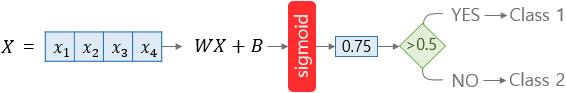
- **가설** : H(x) = sigmoid(WX + B)
<br>
### 2. 소프트맥스 회귀
소프트맥스 회귀는 확률의 총 합이 1이 되는 이 아이디어를 다중 클래스 분류 문제에 적용한다. 소프트맥스 회귀는 각 클래스. 즉, 각 선택지마다 소수 확률을 할당한다. 이때 총 확률의 합은 1이 되어야한다. 이렇게 되면 각 선택지가 정답일 확률로 표현된다.
![image-3.png](attachment:image-3.png)
결국 소프트맥스 회귀는 선택지의 개수만큼의 차원을 가지는 벡터를 만들고, 해당 벡터가 벡터의 모든 원소의 합이 1이 되도록 원소들의 값을 변환시키는 어떤 함수를 지나게 만들어야한다. 위의 그림은 붓꽃 품종 분류하기 문제 등과 같이 선택지의 개수가 3개일때, 3차원 벡터가 어떤 함수 ?를 지나 원소의 총 합이 1이 되도록 원소들의 값이 변환되는 모습을 보여준다. 뒤에서 배우겠지만, 이 함수를 소프트맥스(softmax) 함수라고 한다.
- **가설** : H(X) = softmax(WX + B)
<br>
## 2. 소프트맥스 함수(Softmax function)
---
소프트맥스 함수는 분류해야하는 정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정한다. 우선 수식에 대해 설명하고, 그 후에 그림으로 이해해본다.
<br><br>
### 1) 소프트맥스 함수의 이해
k차원의 벡터에서 i번째 원소를 zi, i번째 클래스가 정답일 확률을 pi로 나타낸다고 했을 때 소프트 맥스 함수는 pi를 다음과 같이 정의한다.
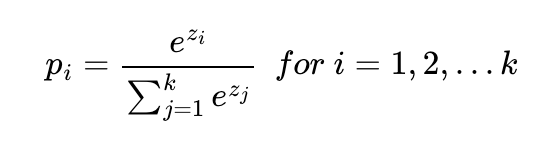
위에서 풀어야하는 문제에 소프트맥스 함수를 차근차근 적용해보자. 위에서 풀어야하는 문제의 경우 k=3이므로 3차원 벡터 z = [z1 z2 z3]의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴한다.
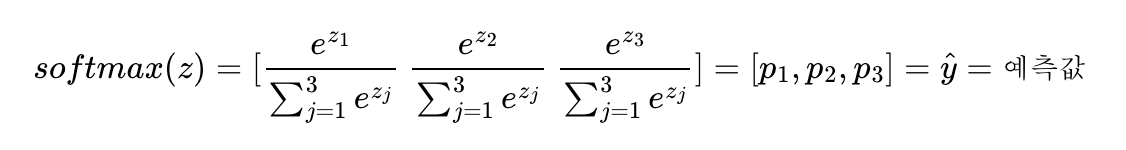
p1, p2, p3 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 각각 0과 1사이의 값으로 총 합은 1이 된다. 여기서 분류하고자 하는 3개의 클래스는 virginica, setosa, versicolor이므로 결국 주어진 입력이 virginica일 확률, setosa일 확률, versicolor일 확률을 나타내는 값을 의미한다.  여기서는 i가 1일 때는 virginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일때는 versicolor일 확률이라고 지정했다. 이 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택이다. 이에따라 식을 문제에 맞게 다시 쓰면 아래와 같다.
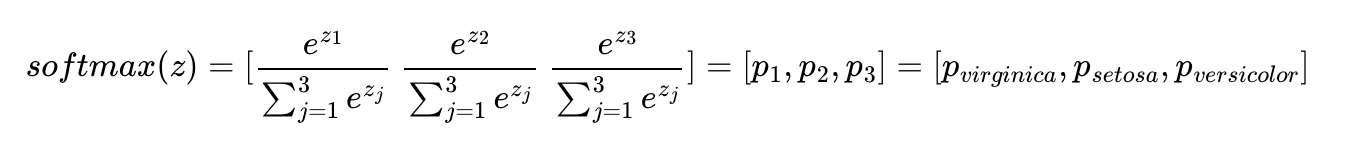
다소 복잡해보이지만 어려운 개념이 아니다. 분류하고자 하는 클래스가 k개일 때, k차원의 벡터를 입력받아서 모든 벡터 원소의 값을 0과 1사이의 값으로 값을 변경하여 다시 k차원의 벡터를 리턴한다는 내용을 식으로 기재했을 뿐이다.
### 2) 그림을 통한 이해
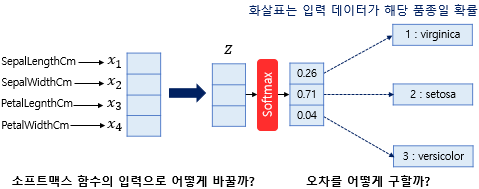
위의 그림에 점차 살을 붙여보자. 여기서는 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정해본다. 즉, 배치 크기가 1이다.<br><br>
위 그림에는 두가지 질문이 있다. 첫번째 질문은 소프트맥스 함수의 입력에 대한 질문이다. 하나의 샘플 데이터는 4개의 독립 변수 x를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미한다. 그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야한다. 위의 그림에서는 소프트맥스 함수의 입력으로 사용되는 3차원 벡터를 z로 표현했다.
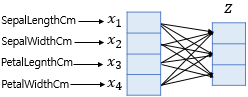
샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은 간단하다. 소프트맥스 함수의 입력 벡터 z의 차원수만큼 결과값이 나오도록 가중치 곱을 진행한다. 위의 그림에서 화살표는 총(4 x 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경된다.
<br><br>
두번째 질문은 오차 계산 방법에 대한 질문이다. 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가진다. 이 각각은 특정 클래스가 정답일 확률을 나타낸다. 여기서는 첫번째 원소인 p1은 virginica가 정답일 확률, 두번째 원소인 p2는 setosa가 정답일 확률, 세번째 원소인 p3은 versicolor가 정답일 확률로 고려한다. 그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야한다. 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현한다.
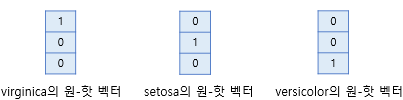
실제값의 정수 인코딩은 1, 2, 3이 되고 이에 원-핫 인코딩을 수행하여 실제값을 원-핫 벡터로 수치화한 것을 보여준다.
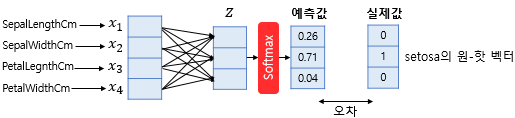
예를 들어 현재 풀고 있는 샘플 데이터의 실제값이 setosa라면 setosa의 원-핫 벡터는 [0 1 0]이다. 이 경우, 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 [0 1 0]이 되는 경우다. 이 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하는데, 이는 뒤에서 비용함수 설명에서 다시 언급한다.
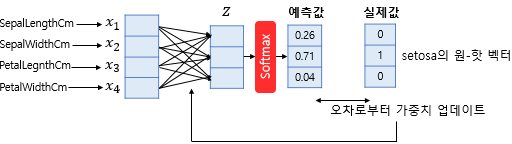
이제 앞서 배운 선형 회귀나 로지스틱 회귀와 마찬가지로 오차롭터 가중치를 업데이트한다.
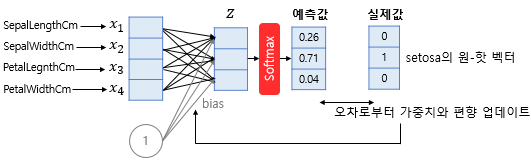
더 정확히는 선형 회귀나 로지스틱 회귀와 마찬가지로 편향 또한 업데이틔 대상이 되는 매개 변수다. 소프트 맥스 회귀를 벡터와 행렬 연산으로 이해해본다. 입력을 특성(feature)의 수만큼의 차원을 가진 입력 벡터 x라고 하고, 가중치 행렬을 W, 편향을 b라고 했을 때, 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같다.
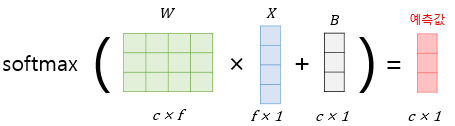
여기서 f는 특성의 수이며 c는 클래스의 개수에 해당된다.
<br>
## 3. 붓꽃 품종 분류하기 행렬 연산으로 이해하기
---
위의 붓꽃 품종 분류 문제의 가설식을 행렬 연산으로 표현해본다. 우선 위의 예제의 데이터는 전체 샘플의 개수가 5개, 특성이 4개이므로 5 x 4 행렬 X로 정의한다.
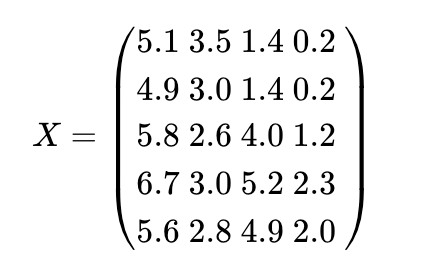
편의를 위해 각 행렬의 원소 위치를 반영한 변수로 표현한다.
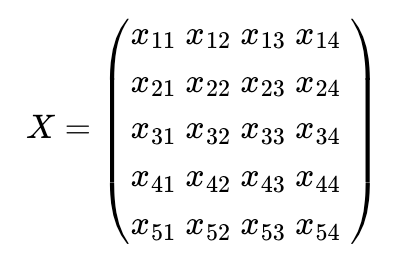
이번 문제는 선택지가 총 3개인 문제이므로 가설의 예측값으로 얻는 행렬 ^Y의 열의 개수는 3개여야 한다. 그리고 각 행은 행렬 X의 각 행의 예측값이므로 행의 크기는 동일해야한다. 결과적으로 행렬 ^Y의 크기는 5 x 3이다.
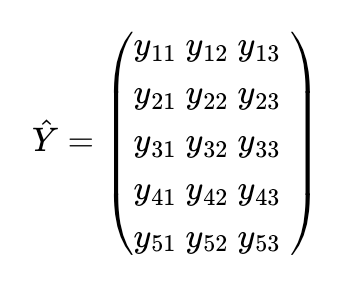
크기 5 x 3의 행렬 ^Y는 크기 5 x 4 입력 행렬 X와 가중치 행렬 W의 곱으로 얻어지는 행렬이므로 가중치 행렬 W의 크기는 추정을 통해 4 x 3의 크기를 가진 행렬임을 알 수 있다.
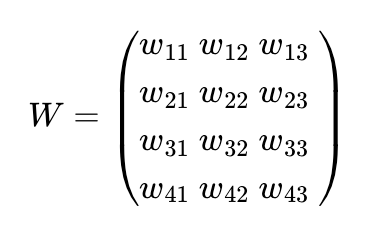
편향 행렬 B는 예측값 행렬 ^Y와 크기가 동일해야 하므로 5 x 3의 크기를 가진다.
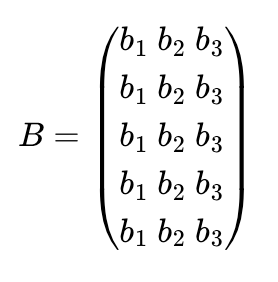
결과적으로 가설식은 다음과 같다.
^Y = softmax(XW + B)
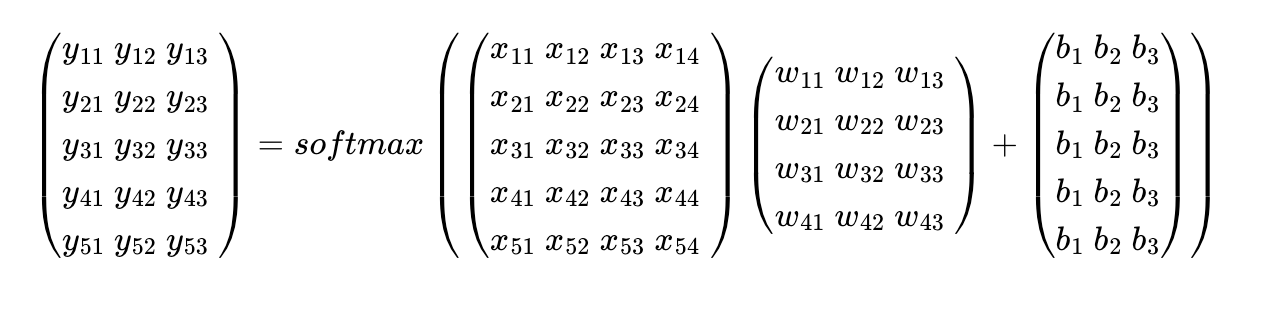
<br>
## 4. 비용 함수(Cost function)
---
소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용한다. 여기서는 소프트맥스 회귀에서의 크로스 엔트로피 함수뿐만 아니라, 다양한 표기 방법에 대해서 이해해본다.<br><br>
### 1) 크로스 엔트로피 함수
아래에서 y는 실제값을 나타내며, k는 클래스의 개수로 정의한다. yj는 실제값 원-핫 벡터의 j번째 인덱스를 의미하며, pj는 샘플 데이터가 j번째 클래스일 확률을 나타낸다. 표기에 따라서 ^yj로 표현하기도 한다.
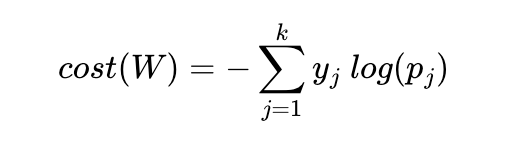
이 함수가 왜 비용 함수로 적합한지 알아본다. c가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, pc = 1은 ^y가 y를 정확하게 예측한 경우가 된다. 이를 식에 대입해보면 -1log(1) = 0이 되기 때문에, 결과적으로 ^y가 y를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 된다.
즉 cost(w) 이 값이 최소화하는 방향으로 학습해야한다.<br>
이제 이를 n개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용 함수는 다음과 같다.
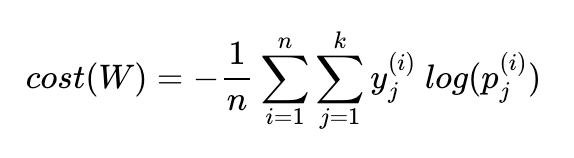
<br>
### 2) 이진 분류에서의 크로스 엔트로피 함수
로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만, 본질적으로 동일한 함수식이다. 로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출해본다.
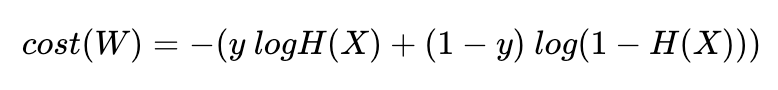
위의 식은 앞서 로지스틱 회귀에서 배웠던 크로스 엔트로피의 함수식을 보여준다. 위의 식에서 y를 y1, 1-y을 y2로 치환하고 H(x)를 p1, 1 - H(X)를 p2로 치환해본다. 결과적으로 아래의 식을 얻을 수 있다.
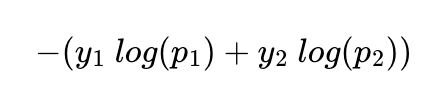
이 식은 아래와 같이 표현할 수 있다.
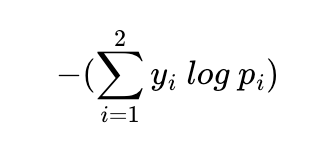
소프트맥스 회귀에서는 k의 값이 고정된 값이 아니므로 2를 k로 변경한다.
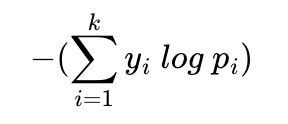
위의 식은 결과적으로 소프트맥스 회귀의 식과 동일하다. 역으로 소프트맥스 회귀에서 로지스틱 회귀의 크로스 엔트로피 함수식을 얻는 것은 k를 2로 하고, y1과 y2를 각각 y와 1-y로 치환하고 p1과 p2를 각각 H(X)와 1-H(X)로 치환하면 된다.
정리하면 소프트맥스 함수의 최종 비용 함수에서 k가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같다.
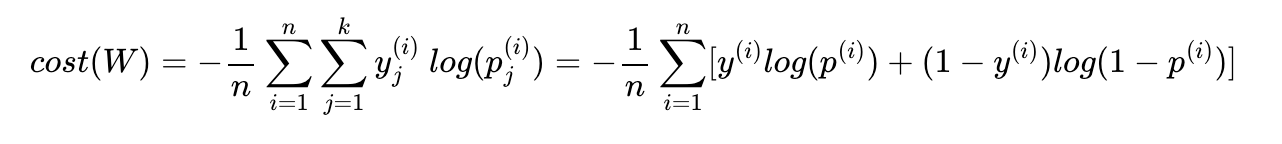